---

# __Data Wrangling: Does audience engagement influence the cancellation of Netflix TV shows in 2023?__
### VU Amsterdam 2025

### __By Einav Cohen, Kevyn Smit, Sona Yavrumyan, Mike Voeten__

---

## 1.0 Installation

--- 

In [40]:
# %pip install pandas
# %pip install numpy
# %pip install openpyxl
# %pip install seaborn
# %pip install matplotlib
# %pip install scipy
# %pip install scikit-learn
# %pip install statsmodels

---

## 1.1 Imports

---

In [41]:
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For array operations
from datetime import datetime  # For handling date columns
import seaborn as sns # For visualisations
from matplotlib.ticker import FuncFormatter # For visualisations
import matplotlib.pyplot as plt # For Visuals
import scipy.stats as stats # For statistical analysis
from sklearn.model_selection import train_test_split # For training Logistic Regression
from sklearn.linear_model import LogisticRegression # Logistic Regression for RQ
from sklearn.metrics import confusion_matrix, classification_report # For evaluating Logistic Regression
import statsmodels.api as sm # For P values

pd.set_option("display.max_rows", 20)  # Limit the number of rows displayed when printing a DataFrame
pd.set_option('display.max_colwidth', None)  # Prevent truncation of long text
pd.set_option('display.width', 200)  # Adjust overall display width to prevent line breaks

---

## 1.2 Setting Working Directory

---

In [42]:
%cd ..
%cd output

c:\Users\Mike9\Desktop\Data_Wrangling
c:\Users\Mike9\Desktop\Data_Wrangling\output


---

## 1.3 Loading the Dataset

---

In [43]:
aggregated_df = pd.read_csv("aggregated.csv")

canceled_shows = aggregated_df[aggregated_df["Cancelled"] == True]
non_canceled_shows = aggregated_df[aggregated_df["Cancelled"] == False]
most_discussed_show = aggregated_df.loc[aggregated_df["Total Comments (2023)"].idxmax()]
top_commented_shows = aggregated_df.sort_values(by="Total Comments (2023)", ascending=False).head(10)
aggregated_df

,Unnamed: 0,Title,Normalized_Show_Name,Total Hours Viewed in 2023,Total Posts (2023),Total Comments (2023),Cancelled
0,0,"Ada Twist, Scientist: Season 4",ada twist scientist,7700000,1,19,True
1,1,Agent Elvis: Season 1,agent elvis,6600000,6,629,True
2,2,Bake Squad: Season 2,bake squad,57600000,0,0,True
3,3,Bling Empire: New York: Season 1,bling empire new york,38700000,65,4922,True
4,4,Copenhagen Cowboy: Season 1,copenhagen cowboy,8900000,4,159,True
...,...,...,...,...,...,...,...
35,35,In the Dark (2019): Season 4,in the dark 2019,15000000,5,223,False
36,36,Terrace House: Aloha State: Part 4 // テラスハウス Aloha State: Part 4,terrace house aloha state,1300000,13,871,False
37,37,Spirit Riding Free: Riding Academy: Part 2,spirit riding free riding academy,12600000,65,5188,False
38,38,DRIFTING DRAGONS: Season 1 // 空挺ドラゴンズ: シーズン1,drifting dragons,1700000,0,0,False


--- 

## 1.4 Auxiliary Functions

---

In [44]:
# Function to convert large numbers into readable format (millions)
def millions_formatter(x, pos):
    return f'{x/1e6:.1f}M'

---

## 2.0 Describing Dataset Characteristics

---

2.0 Dataset Characteristics \
2.1 Viewership and total engagement \
2.2 Viewership and total comments

### 2.0.1 Canceled Shows

In [45]:
canceled_shows.describe()

,Unnamed: 0,Total Hours Viewed in 2023,Total Posts (2023),Total Comments (2023)
count,20.00000,2.000000e+01,20.000000,20.000000
mean,9.50000,6.561500e+07,7.550000,681.850000
std,5.91608,6.178942e+07,15.343351,1340.922906
min,0.00000,6.600000e+06,0.000000,0.000000
25%,4.75000,2.367500e+07,0.750000,14.250000
50%,9.50000,4.455000e+07,2.500000,139.000000
75%,14.25000,8.692500e+07,5.000000,496.500000
max,19.00000,2.193000e+08,65.000000,4922.000000


### 2.0.2 Non-Cancelled Shows

In [46]:
non_canceled_shows.describe()

,Unnamed: 0,Total Hours Viewed in 2023,Total Posts (2023),Total Comments (2023)
count,20.00000,2.000000e+01,20.000000,20.000000
mean,29.50000,2.045500e+07,13.450000,916.000000
std,5.91608,4.481867e+07,24.919819,1767.610876
min,20.00000,4.000000e+05,0.000000,0.000000
25%,24.75000,3.425000e+06,1.000000,20.500000
50%,29.50000,9.000000e+06,5.000000,196.000000
75%,34.25000,1.402500e+07,9.000000,447.750000
max,39.00000,2.048000e+08,93.000000,5696.000000


### 2.0.3 Cancelled and Non-Cancelled Shows

In [47]:
aggregated_df.describe()

,Unnamed: 0,Total Hours Viewed in 2023,Total Posts (2023),Total Comments (2023)
count,40.000000,4.000000e+01,40.000000,40.000000
mean,19.500000,4.303500e+07,10.500000,798.925000
std,11.690452,5.797889e+07,20.643494,1553.129089
min,0.000000,4.000000e+05,0.000000,0.000000
25%,9.750000,7.850000e+06,1.000000,17.500000
50%,19.500000,1.590000e+07,3.000000,151.500000
75%,29.250000,4.880000e+07,5.250000,496.500000
max,39.000000,2.193000e+08,93.000000,5696.000000


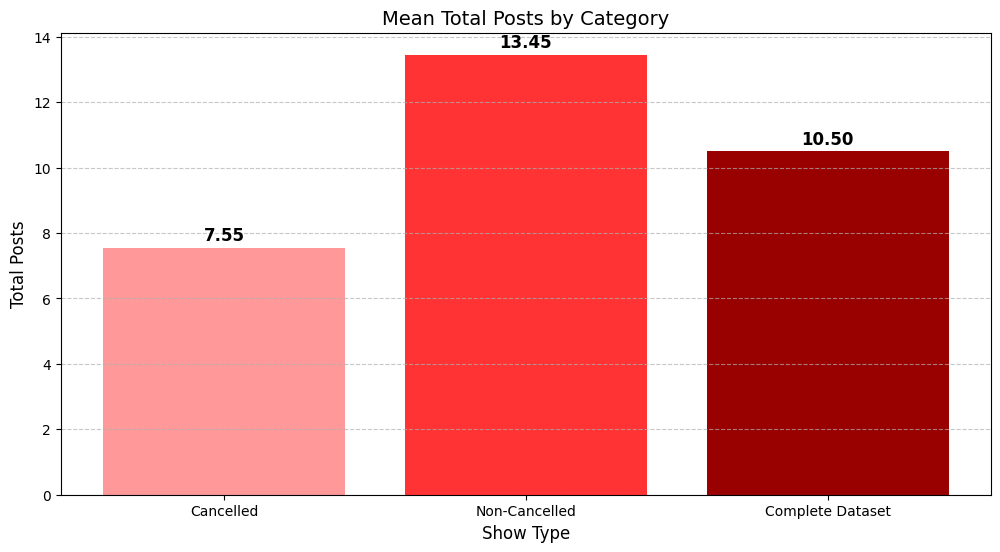

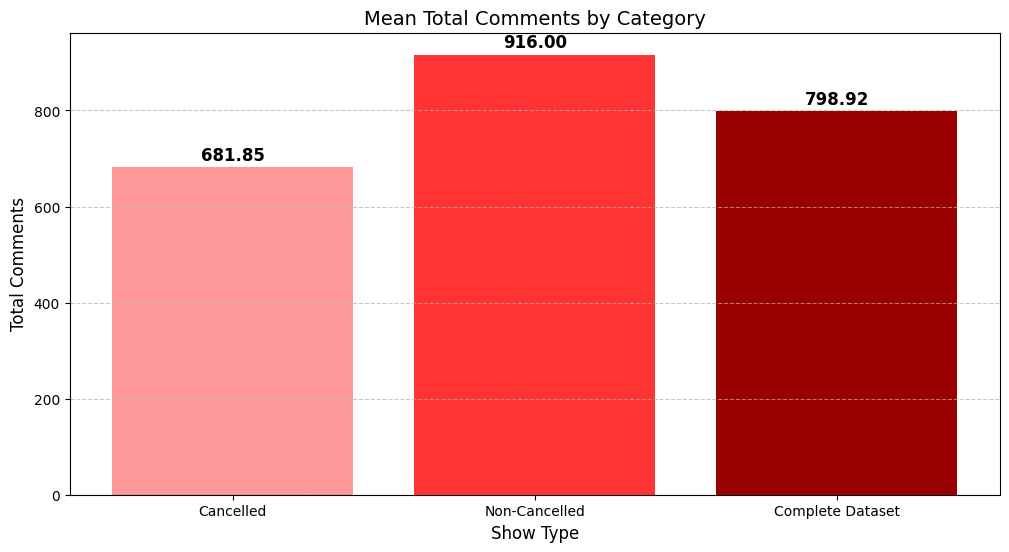

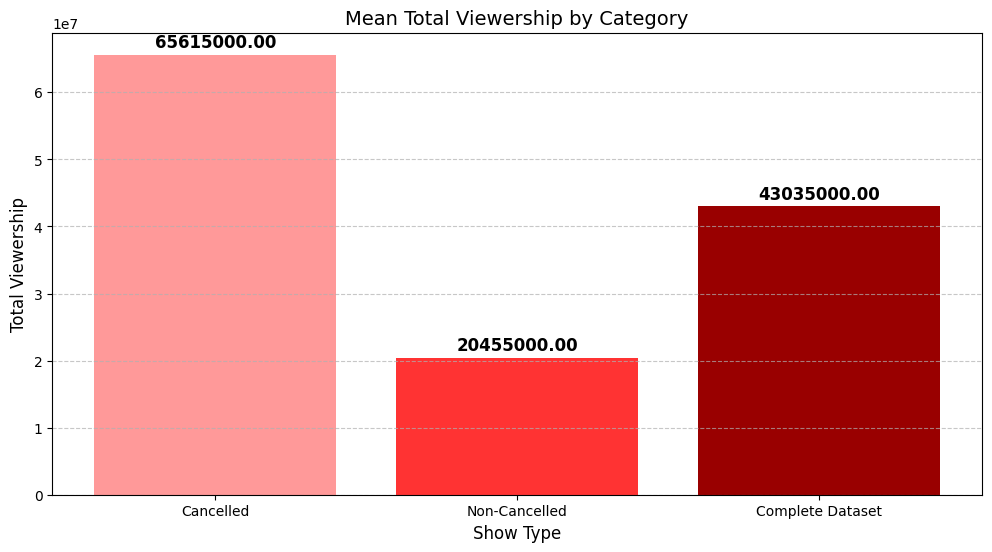

In [ ]:
mean_values = aggregated_df.groupby('Cancelled')[['Total Posts (2023)', 'Total Comments (2023)', 'Total Hours Viewed in 2023']].mean()
mean_complete = aggregated_df[['Total Posts (2023)', 'Total Comments (2023)', 'Total Hours Viewed in 2023']].mean()

metrics = ['Total Posts (2023)', 'Total Comments (2023)', 'Total Hours Viewed in 2023']
metric_names = ['Total Posts', 'Total Comments', 'Total Viewership']
categories = ['Cancelled', 'Non-Cancelled', 'Complete Dataset']
colors = ['#FF9999', '#FF3333', '#990000']

for i, metric in enumerate(metrics):
    fig, ax = plt.subplots(figsize=(12, 6))
    bars = [mean_values.loc[True, metric], mean_values.loc[False, metric], mean_complete[metric]]
    bars_plot = ax.bar(categories, bars, color = colors)
    for bar in bars_plot:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy = (bar.get_x() + bar.get_width() / 2, height),
                    xytext = (0, 5),
                    textcoords = "offset points",
                    ha='center', fontsize = 12, fontweight = 'bold')
    ax.set_title(f"Mean {metric_names[i]} by Category", fontsize = 14)
    ax.set_ylabel(metric_names[i], fontsize = 12)
    ax.set_xlabel("Show Type", fontsize = 12)
    plt.grid(axis = 'y', linestyle='--', alpha = 0.7)

    plt.show()


---

## 2.1 Viewership and total engagement (comments + posts)

---

C:\Users\Mike9\AppData\Local\Temp\ipykernel_11752\3588208527.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


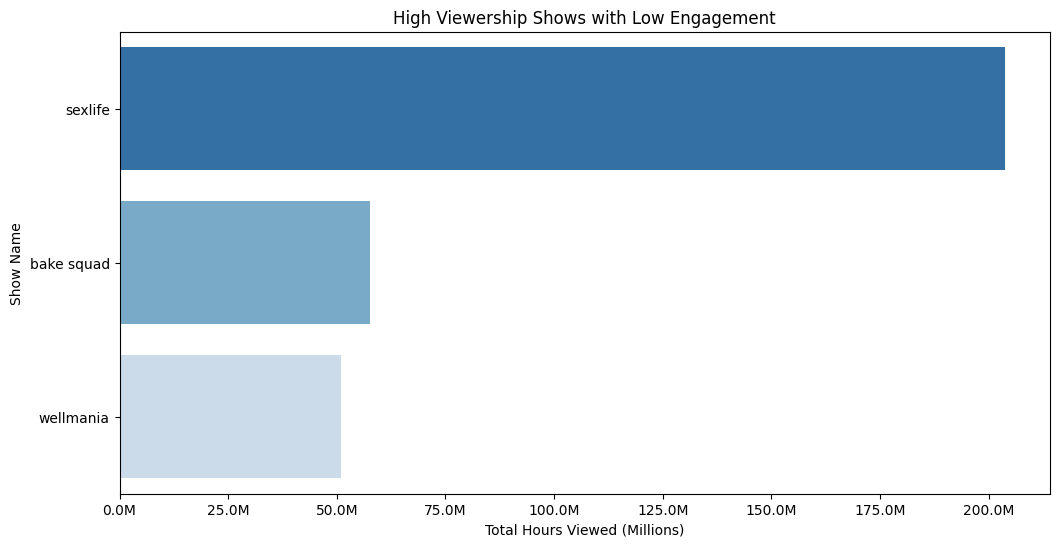

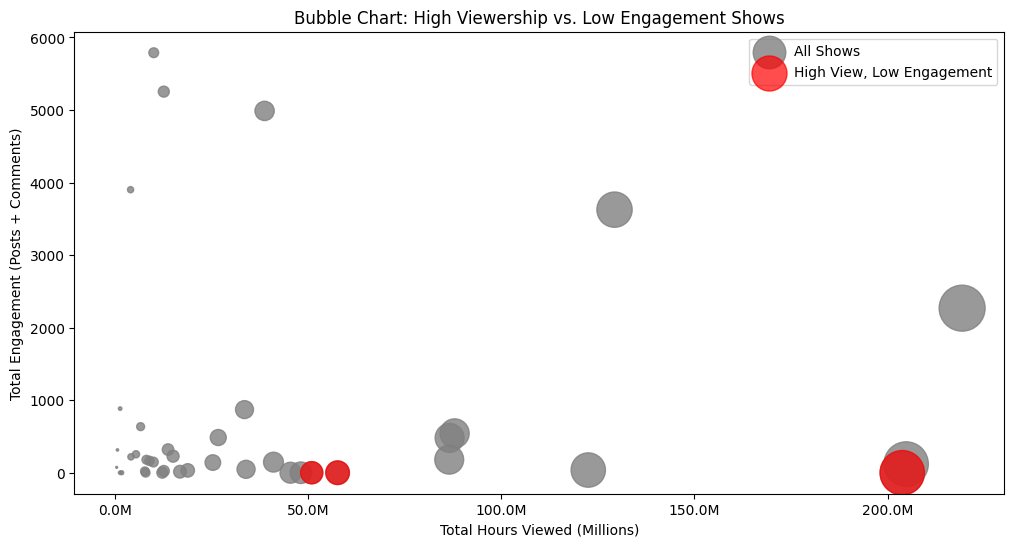

In [49]:
# (Low Engagement = Posts + Comments < Threshold) 
# Actually became more of a measure of the success of the API calls
engage_thresh = 10
high_viewership_thresh = aggregated_df["Total Hours Viewed in 2023"].quantile(0.75)  # Top 25% views
aggregated_df["Total Engagement"] = aggregated_df["Total Posts (2023)"] + aggregated_df["Total Comments (2023)"]
high_view_low_engagement = aggregated_df[(aggregated_df["Total Hours Viewed in 2023"] >= high_viewership_thresh) & (aggregated_df["Total Engagement"] < engage_thresh)].sort_values(by="Total Hours Viewed in 2023", ascending=False)

# Visualization 1: Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(
    data = high_view_low_engagement,
    x = "Total Hours Viewed in 2023",
    y = "Normalized_Show_Name",
    palette = "Blues_r"
)
plt.xlabel("Total Hours Viewed (Millions)")
plt.ylabel("Show Name")
plt.title("High Viewership Shows with Low Engagement")
plt.gca().xaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.show()


# Visualization 2: Bubble Chart
plt.figure(figsize = (12, 6))
plt.scatter(
    aggregated_df["Total Hours Viewed in 2023"],
    aggregated_df["Total Engagement"],
    s = aggregated_df["Total Hours Viewed in 2023"] / 2e5, 
    alpha = 0.8,
    label = "All Shows",
    color = "gray"
)
plt.scatter(
    high_view_low_engagement["Total Hours Viewed in 2023"],
    high_view_low_engagement["Total Engagement"],
    s=high_view_low_engagement["Total Hours Viewed in 2023"] / 2e5,
    alpha = 0.7,
    label = "High View, Low Engagement",
    color = "red"
)
plt.xlabel("Total Hours Viewed (Millions)")
plt.ylabel("Total Engagement (Posts + Comments)")
plt.title("Bubble Chart: High Viewership vs. Low Engagement Shows")
plt.legend()
plt.gca().xaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.show()


---

## 2.2 Total views and total comments

---

C:\Users\Mike9\AppData\Local\Temp\ipykernel_11752\1994661489.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


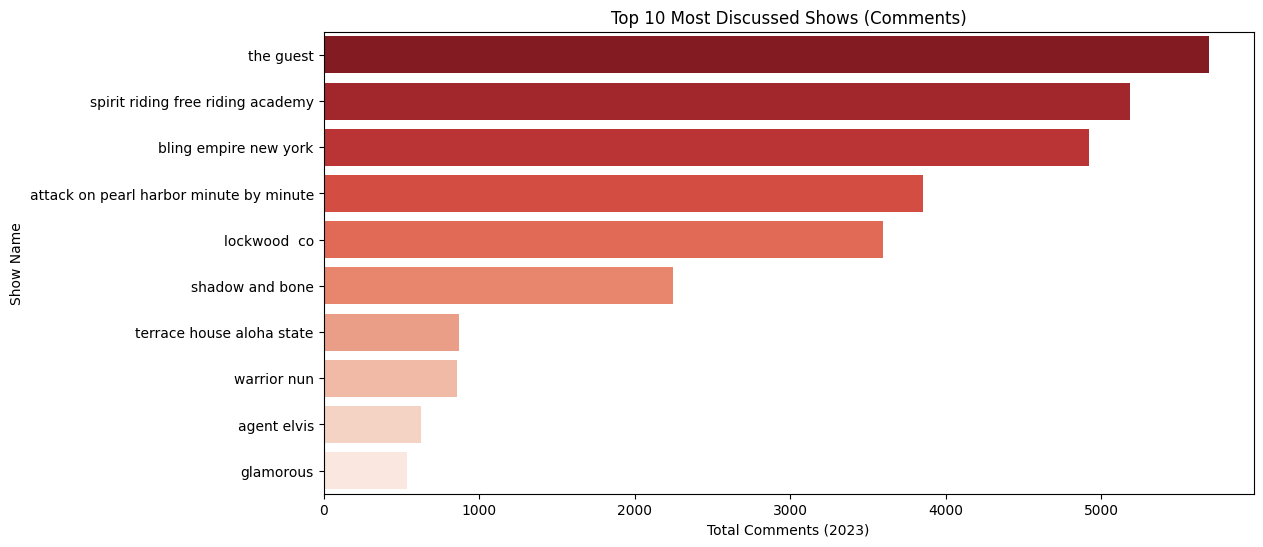

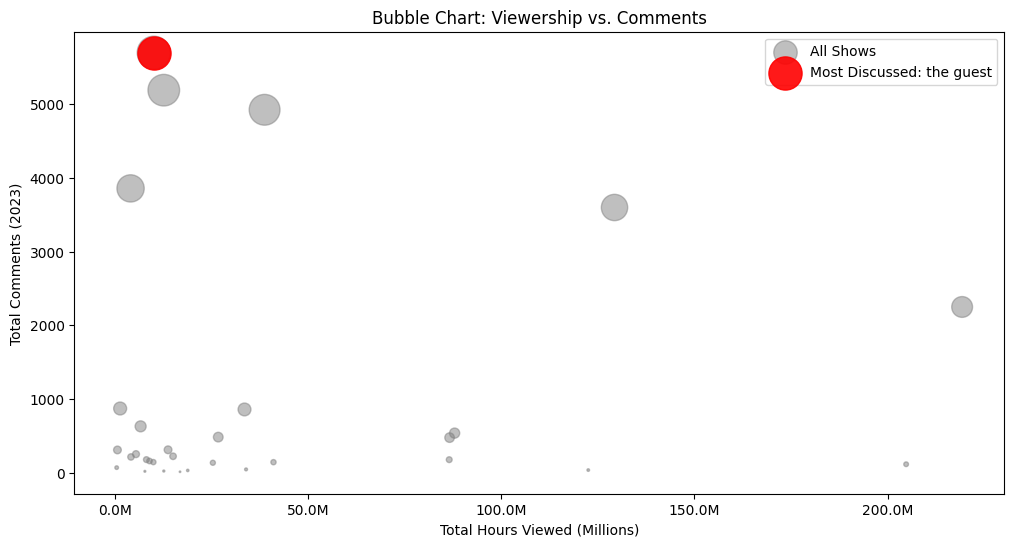

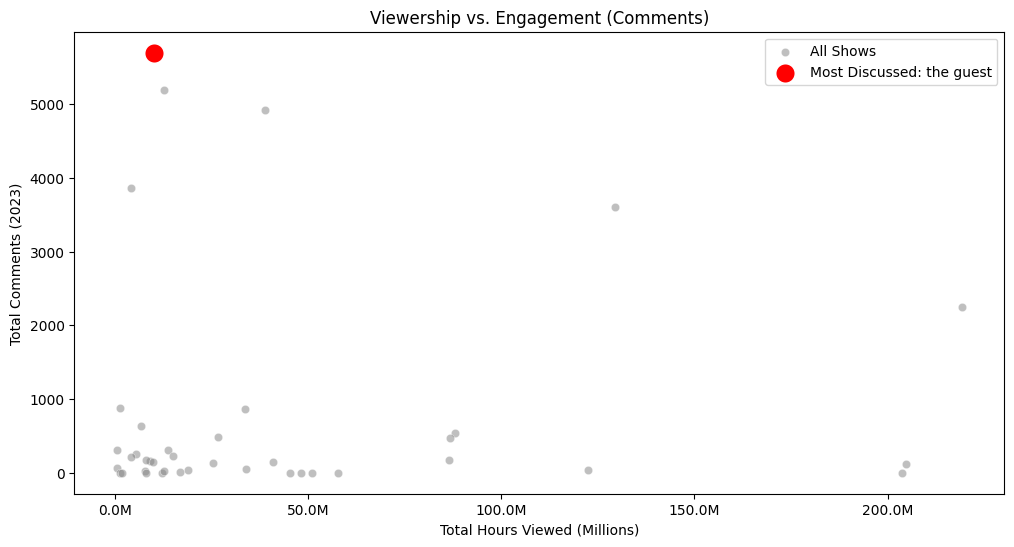

In [50]:
# Visualization 1: Bar Chart (Top Shows by Comments)
plt.figure(figsize = (12, 6))
sns.barplot(
    data = top_commented_shows,
    x = "Total Comments (2023)",
    y = "Normalized_Show_Name",
    palette = "Reds_r"
)
plt.xlabel("Total Comments (2023)")
plt.ylabel("Show Name")
plt.title("Top 10 Most Discussed Shows (Comments)")
plt.show()

# Visualization 2: Bubble Chart (Viewership vs. Comments)
plt.figure(figsize=(12, 6))
plt.scatter(
    aggregated_df["Total Hours Viewed in 2023"],
    aggregated_df["Total Comments (2023)"],
    s = aggregated_df["Total Comments (2023)"] / 10, 
    alpha = 0.5,
    label = "All Shows",
    color = "gray"
)
plt.scatter(
    most_discussed_show["Total Hours Viewed in 2023"],
    most_discussed_show["Total Comments (2023)"],
    s = most_discussed_show["Total Comments (2023)"] / 10,
    alpha = 0.9,
    label = f"Most Discussed: {most_discussed_show['Normalized_Show_Name']}",
    color = "red"
)
plt.xlabel("Total Hours Viewed (Millions)")
plt.ylabel("Total Comments (2023)")
plt.title("Bubble Chart: Viewership vs. Comments")
plt.legend()
plt.gca().xaxis.set_major_formatter(FuncFormatter(millions_formatter)) 
plt.show()

# Visualization 3: Scatter Plot (Viewership vs. Comments)
plt.figure(figsize = (12, 6))
sns.scatterplot(
    data = aggregated_df,
    x = "Total Hours Viewed in 2023",
    y = "Total Comments (2023)",
    color = "gray",
    alpha = 0.5,
    label = "All Shows"
)
sns.scatterplot(
    x = [most_discussed_show["Total Hours Viewed in 2023"]],
    y = [most_discussed_show["Total Comments (2023)"]],
    color = "red",
    s = 200,
    label = f"Most Discussed: {most_discussed_show['Normalized_Show_Name']}"
)
plt.xlabel("Total Hours Viewed (Millions)")
plt.ylabel("Total Comments (2023)")
plt.title("Viewership vs. Engagement (Comments)")
plt.legend()
plt.gca().xaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.show()


---

## 2.3 Differences in the mean viewership between canceled and non-canceled shows

---

C:\Users\Mike9\AppData\Local\Temp\ipykernel_11752\3619936264.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


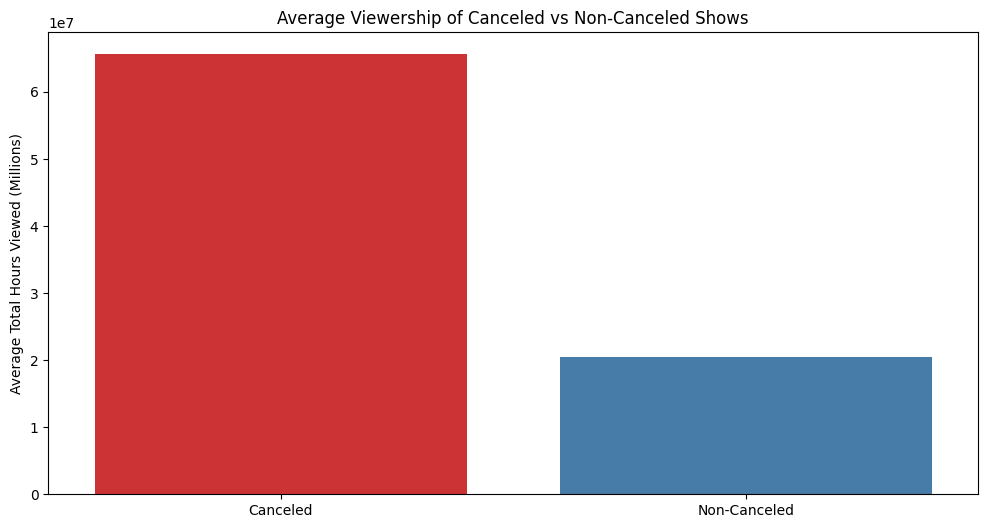

C:\Users\Mike9\AppData\Local\Temp\ipykernel_11752\3619936264.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


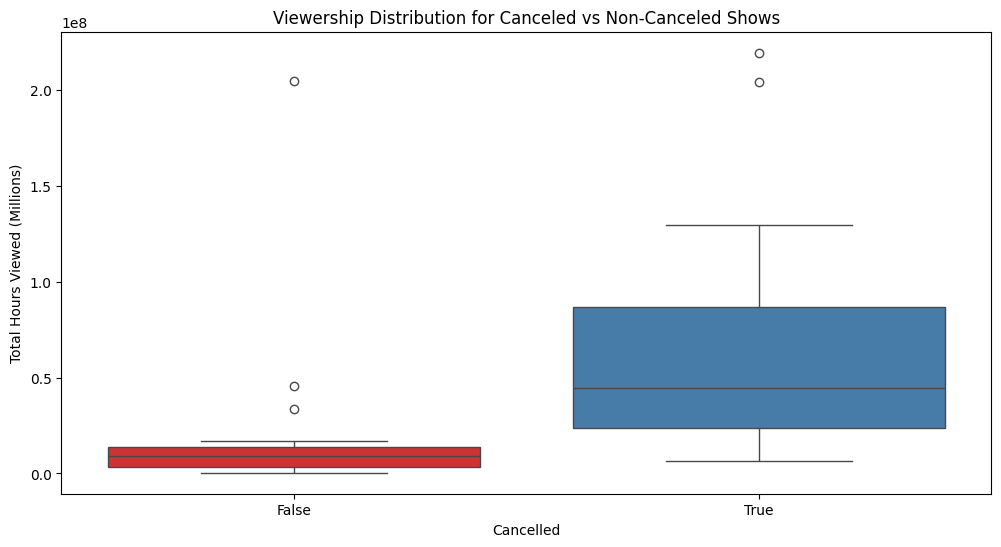

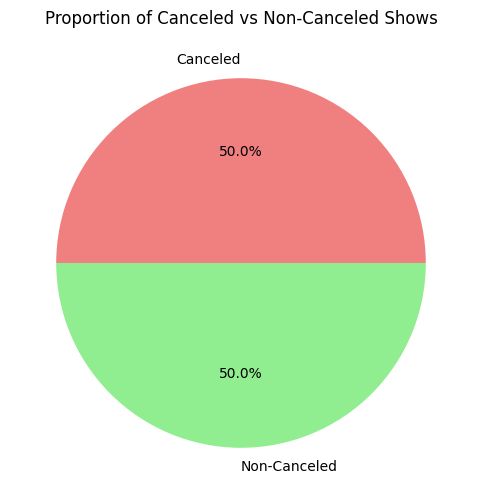

In [51]:
# Visualization 1: Bar Chart (Viewership of Canceled vs Non-Canceled Shows)
plt.figure(figsize = (12, 6))
sns.barplot(
    x = ["Canceled", "Non-Canceled"],
    y = [canceled_shows["Total Hours Viewed in 2023"].mean(), non_canceled_shows["Total Hours Viewed in 2023"].mean()],
    palette="Set1"
)
plt.ylabel("Average Total Hours Viewed (Millions)")
plt.title("Average Viewership of Canceled vs Non-Canceled Shows")
plt.show()

# Visualization 2: Box Plot (Viewership Distribution)
plt.figure(figsize = (12, 6))
sns.boxplot(
    x = "Cancelled", 
    y = "Total Hours Viewed in 2023", 
    data = aggregated_df, 
    palette = "Set1"
)
plt.ylabel("Total Hours Viewed (Millions)")
plt.title("Viewership Distribution for Canceled vs Non-Canceled Shows")
plt.show()

# Visualization 3: Pie Chart (Proportion of Canceled vs Non-Canceled Shows)
plt.figure(figsize = (12, 6))
canceled_count = canceled_shows.shape[0]
non_canceled_count = non_canceled_shows.shape[0]
plt.pie([canceled_count, non_canceled_count], labels = ["Canceled", "Non-Canceled"], autopct = '%1.1f%%', colors = ["lightcoral", "lightgreen"])
plt.title("Proportion of Canceled vs Non-Canceled Shows")
plt.show()


In [52]:
t_stat, p_value = stats.ttest_ind(canceled_shows["Total Hours Viewed in 2023"], non_canceled_shows["Total Hours Viewed in 2023"])

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")
if p_value < 0.05: print("There is a statistically significant difference in the average viewership between canceled and non-canceled shows.")
else: print("There is no statistically significant difference in the average viewership between canceled and non-canceled shows.")


T-statistic: 2.646
P-value: 0.012
There is a statistically significant difference in the average viewership between canceled and non-canceled shows.


## Note: due to low number of datapoints, the conclusion here would actually be: high viewership causes cancellations. 

--- 
## 2.4 Differences in the mean number of posts between cancelled and non-cancelled shows

---

C:\Users\Mike9\AppData\Local\Temp\ipykernel_11752\2769362519.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


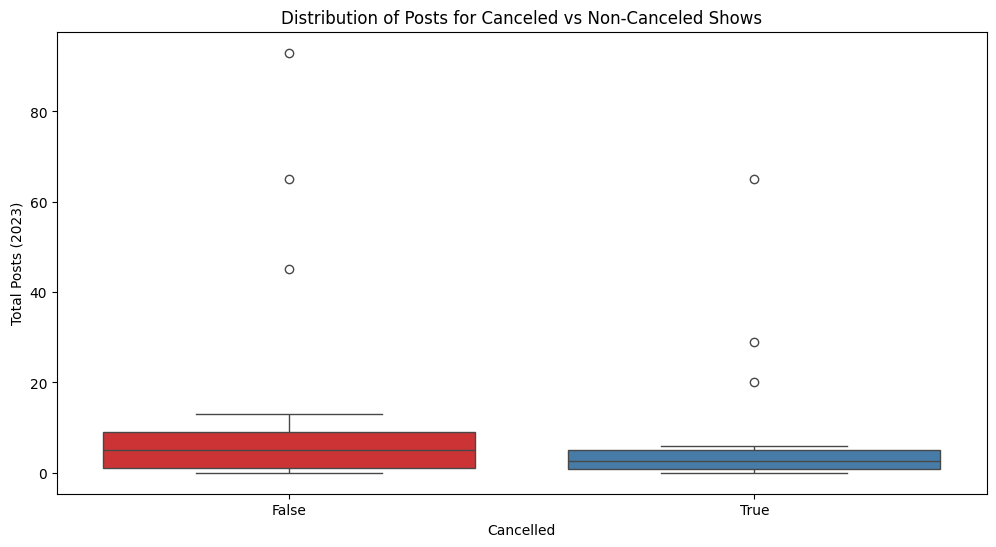

C:\Users\Mike9\AppData\Local\Temp\ipykernel_11752\2769362519.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


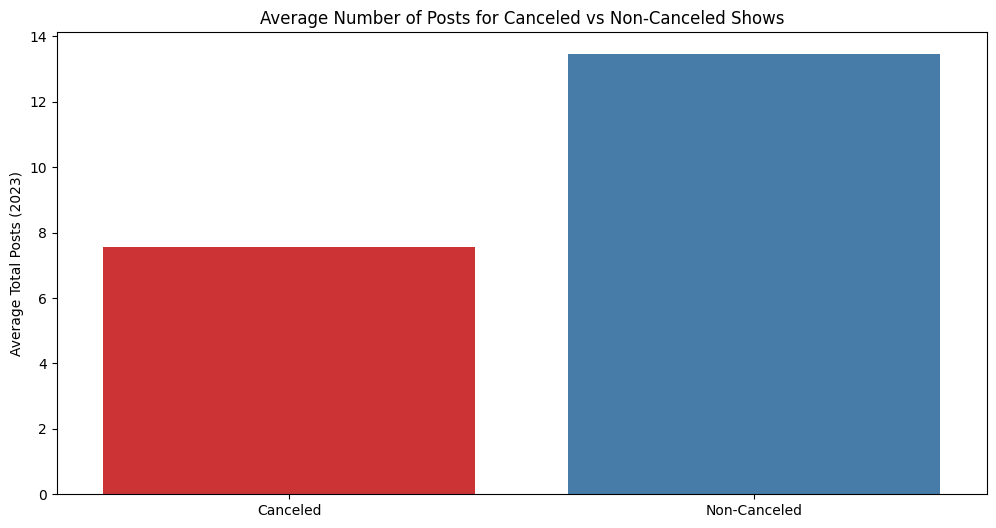

C:\Users\Mike9\AppData\Local\Temp\ipykernel_11752\2769362519.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


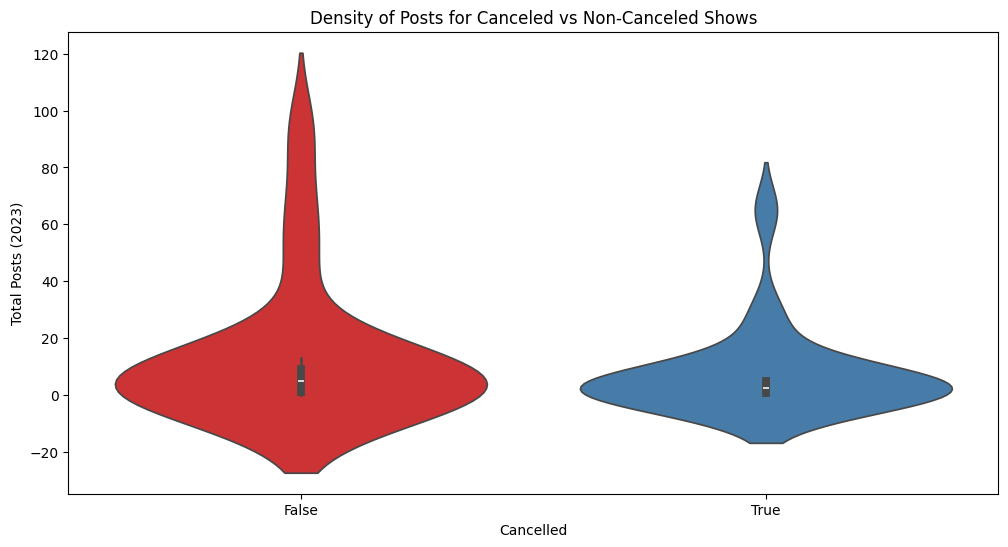

In [53]:
# Visualization 1: Box Plot (Distribution of Posts for Canceled vs Non-Canceled Shows)
plt.figure(figsize=(12, 6))
sns.boxplot(
    x = "Cancelled", 
    y = "Total Posts (2023)", 
    data = aggregated_df, 
    palette = "Set1"
)
plt.ylabel("Total Posts (2023)")
plt.title("Distribution of Posts for Canceled vs Non-Canceled Shows")
plt.show()

# Visualization 2: Bar Plot (Average Number of Posts for Canceled vs Non-Canceled Shows)
plt.figure(figsize=(12, 6))
sns.barplot(
    x = ["Canceled", "Non-Canceled"],
    y = [canceled_shows["Total Posts (2023)"].mean(), non_canceled_shows["Total Posts (2023)"].mean()],
    palette = "Set1"
)
plt.ylabel("Average Total Posts (2023)")
plt.title("Average Number of Posts for Canceled vs Non-Canceled Shows")
plt.show()

# Visualization 3: Violin Plot (Post Distribution Density for Canceled vs Non-Canceled Shows)
plt.figure(figsize=(12, 6))
sns.violinplot(
    x = "Cancelled", 
    y = "Total Posts (2023)", 
    data = aggregated_df, 
    palette = "Set1"
)
plt.ylabel("Total Posts (2023)")
plt.title("Density of Posts for Canceled vs Non-Canceled Shows")
plt.show()

In [54]:
t_stat_posts, p_value_posts = stats.ttest_ind(canceled_shows["Total Posts (2023)"], non_canceled_shows["Total Posts (2023)"])

print(f"T-statistic for Posts: {t_stat_posts:.3f}")
print(f"P-value for Posts: {p_value_posts:.3f}")

if p_value_posts < 0.05: print("There is a statistically significant difference in the number of posts between canceled and non-canceled shows.")
else: print("There is no statistically significant difference in the number of posts between canceled and non-canceled shows.")

T-statistic for Posts: -0.902
P-value for Posts: 0.373
There is no statistically significant difference in the number of posts between canceled and non-canceled shows.


---

## 2.5 Differences in the mean number of comments between canceled and non-canceled shows.

---

C:\Users\Mike9\AppData\Local\Temp\ipykernel_11752\2204735483.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


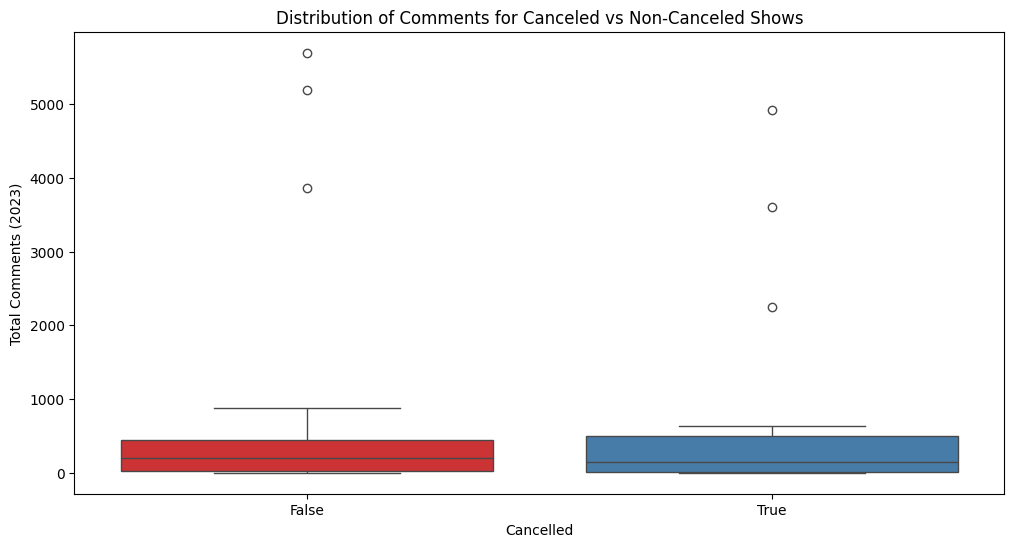

C:\Users\Mike9\AppData\Local\Temp\ipykernel_11752\2204735483.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


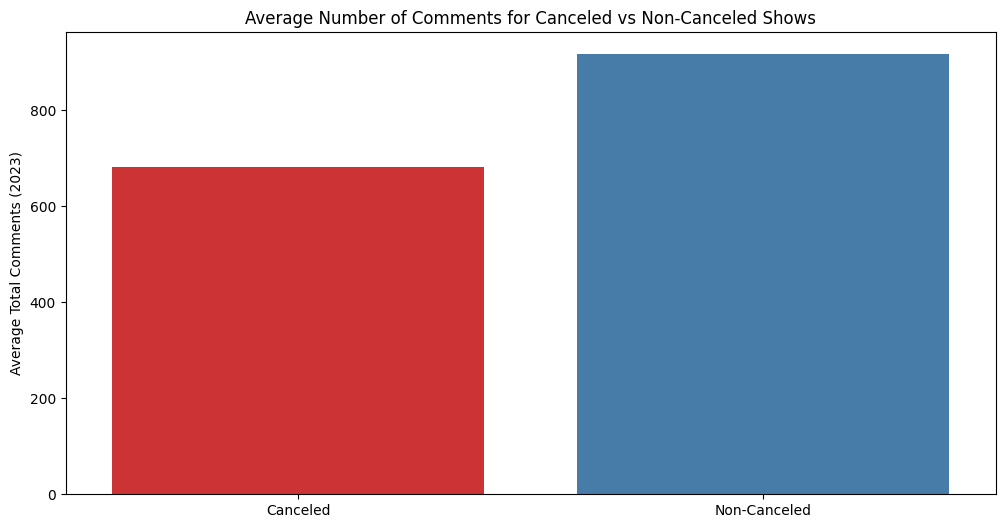

C:\Users\Mike9\AppData\Local\Temp\ipykernel_11752\2204735483.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


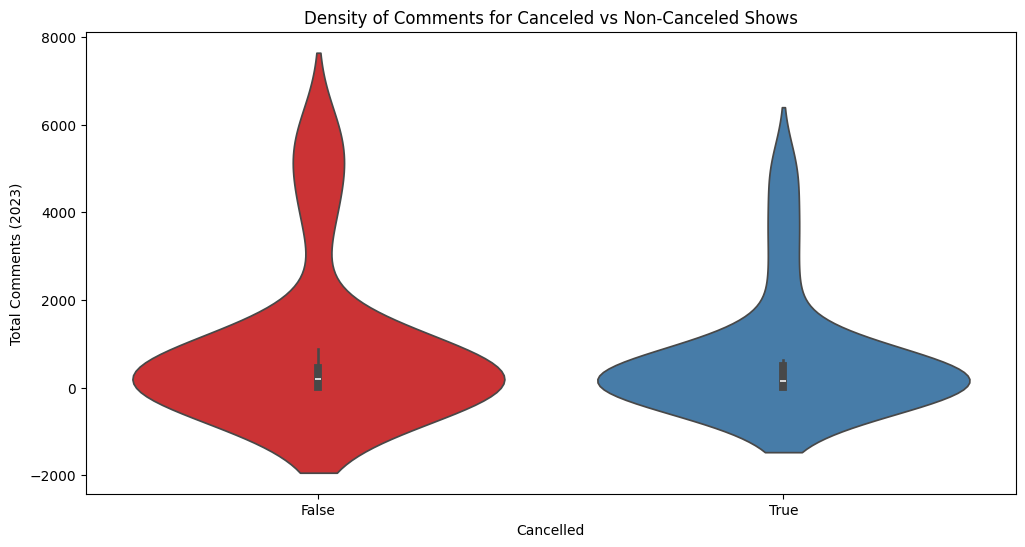

In [55]:
# Visualization 1: Box Plot (Distribution of Comments for Canceled vs Non-Canceled Shows)
plt.figure(figsize = (12, 6))
sns.boxplot(
    x = "Cancelled", 
    y = "Total Comments (2023)", 
    data = aggregated_df, 
    palette = "Set1"
)
plt.ylabel("Total Comments (2023)")
plt.title("Distribution of Comments for Canceled vs Non-Canceled Shows")
plt.show()

# Visualization 2: Bar Plot (Average Number of Comments for Canceled vs Non-Canceled Shows)
plt.figure(figsize = (12, 6))
sns.barplot(
    x = ["Canceled", "Non-Canceled"],
    y = [canceled_shows["Total Comments (2023)"].mean(), non_canceled_shows["Total Comments (2023)"].mean()],
    palette = "Set1"
)
plt.ylabel("Average Total Comments (2023)")
plt.title("Average Number of Comments for Canceled vs Non-Canceled Shows")
plt.show()

# Visualization 3: Violin Plot (Comment Distribution Density for Canceled vs Non-Canceled Shows)
plt.figure(figsize = (12, 6))
sns.violinplot(
    x = "Cancelled", 
    y = "Total Comments (2023)", 
    data = aggregated_df, 
    palette = "Set1"
)
plt.ylabel("Total Comments (2023)")
plt.title("Density of Comments for Canceled vs Non-Canceled Shows")
plt.show()

In [56]:
t_stat_comments, p_value_comments = stats.ttest_ind(canceled_shows["Total Comments (2023)"], non_canceled_shows["Total Comments (2023)"])

print(f"T-statistic for Comments: {t_stat_comments:.3f}")
print(f"P-value for Comments: {p_value_comments:.3f}")

if p_value_comments < 0.05: print("There is a statistically significant difference in the number of comments between canceled and non-canceled shows.")
else: print("There is no statistically significant difference in the number of comments between canceled and non-canceled shows.")

T-statistic for Comments: -0.472
P-value for Comments: 0.640
There is no statistically significant difference in the number of comments between canceled and non-canceled shows.


---

## 2.6 corellation between the number of posts and total hours viewed

---

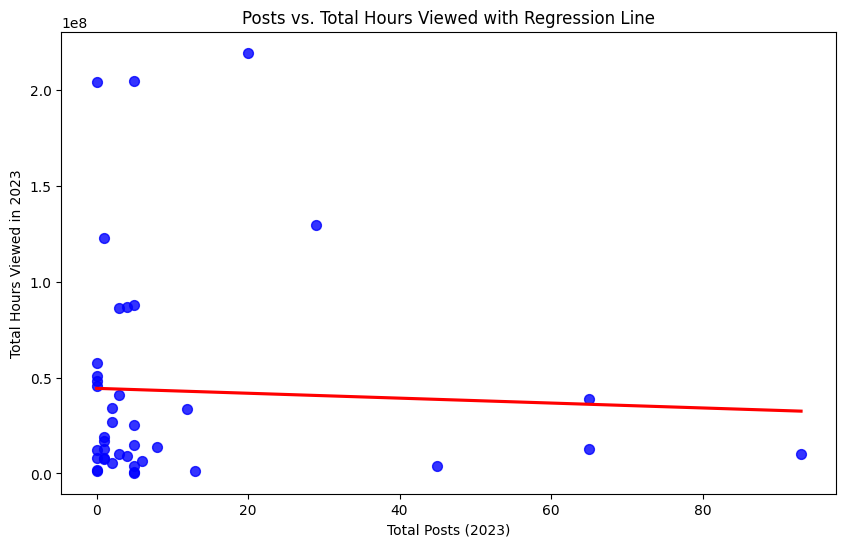

In [57]:
# Visualization: Scatter Plot with Regression Line (Posts vs. Total Hours Viewed)
plt.figure(figsize = (10, 6))
sns.regplot(
    x = "Total Posts (2023)", 
    y = "Total Hours Viewed in 2023", 
    data = aggregated_df, 
    scatter_kws = {'s': 50, 'color': 'blue'},
    line_kws = {'color': 'red'}, 
    ci = None 
)
plt.xlabel("Total Posts (2023)")
plt.ylabel("Total Hours Viewed in 2023")
plt.title("Posts vs. Total Hours Viewed with Regression Line")
plt.show()


In [58]:
corr, p_value = stats.pearsonr(aggregated_df["Total Posts (2023)"], aggregated_df["Total Hours Viewed in 2023"])

print(f"Pearson corellation Coefficient: {corr:.3f}")
print(f"P-value: {p_value:.3f}")

if p_value < 0.05: print("There is a statistically significant positive corellation between the number of posts and total hours viewed.")
else: print("There is no statistically significant corellation between the number of posts and total hours viewed.")


Pearson Correlation Coefficient: -0.045
P-value: 0.780
There is no statistically significant correlation between the number of posts and total hours viewed.


---

## 2.7 corellation between the number of posts and the number of comments

---

# Was part of an idea that no longer seems relevant. keeping it here in case we need more

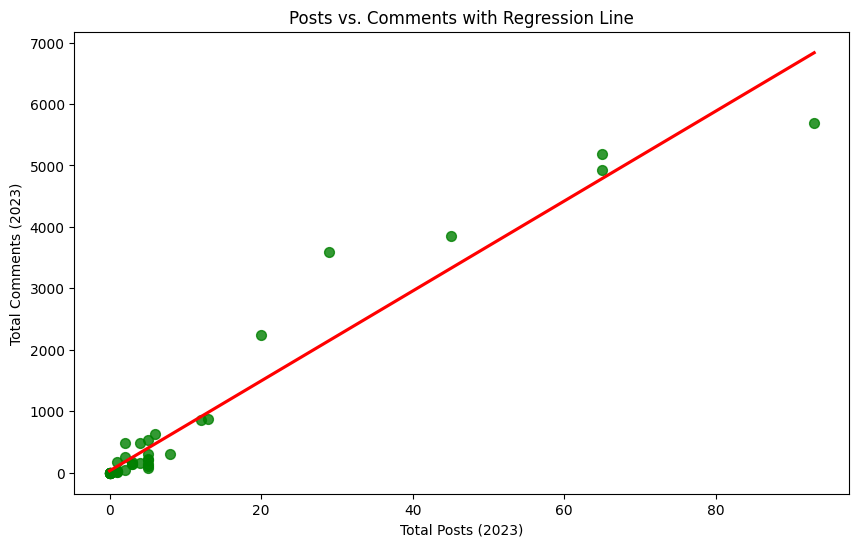

In [59]:
# Visualization: Scatter Plot with Regression Line (Posts vs. Comments), aggregate dataset
plt.figure(figsize = (10, 6))
sns.regplot(
    x = "Total Posts (2023)", 
    y = "Total Comments (2023)", 
    data = aggregated_df, 
    scatter_kws = {'s': 50, 'color': 'green'}, 
    line_kws = {'color': 'red'}, 
    ci = None
)
plt.xlabel("Total Posts (2023)")
plt.ylabel("Total Comments (2023)")
plt.title("Posts vs. Comments with Regression Line")
plt.show()


In [67]:
corr_posts_comments_aggregate_df, p_value_posts_comments_aggregate_df = stats.pearsonr(aggregated_df["Total Posts (2023)"], aggregated_df["Total Comments (2023)"])

print(f"Pearson corellation Coefficient (Posts vs Comments): {corr_posts_comments_aggregate_df:.3f}")
print(f"P-value: {p_value_posts_comments_aggregate_df:.3f}")

if p_value_posts_comments_aggregate_df < 0.05: print("There is a statistically significant positive corellation between the number of posts and the number of comments.")
else: print("There is no statistically significant corellation between the number of posts and the number of comments.")


Pearson Correlation Coefficient (Posts vs Comments): 0.972
P-value: 0.000
There is a statistically significant positive correlation between the number of posts and the number of comments.


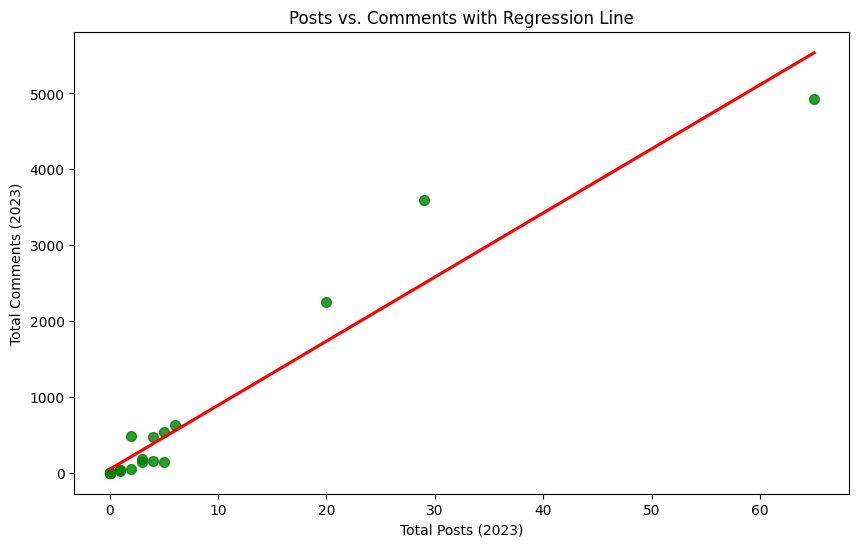

In [61]:
# Visualization: Scatter Plot with Regression Line (Posts vs. Comments), canceled shows
plt.figure(figsize = (12, 6))
sns.regplot(
    x = "Total Posts (2023)", 
    y = "Total Comments (2023)", 
    data = canceled_shows, 
    scatter_kws = {'s': 50, 'color': 'green'}, 
    line_kws = {'color': 'red'}, 
    ci = None
)
plt.xlabel("Total Posts (2023)")
plt.ylabel("Total Comments (2023)")
plt.title("Posts vs. Comments with Regression Line")
plt.show()


In [70]:
corr_posts_comments_canceled, p_value_posts_comments_canceled = stats.pearsonr(canceled_shows["Total Posts (2023)"], canceled_shows["Total Comments (2023)"])

print(f"Pearson corellation Coefficient (Posts vs Comments): {corr_posts_comments_canceled:.3f}")
print(f"P-value: {p_value_posts_comments_canceled:.3f}")

if p_value_posts_comments_canceled < 0.05: print("There is a statistically significant positive corellation between the number of posts and the number of comments.")
else: print("There is no statistically significant corellation between the number of posts and the number of comments.")


Pearson Correlation Coefficient (Posts vs Comments): 0.967
P-value: 0.000
There is a statistically significant positive correlation between the number of posts and the number of comments.


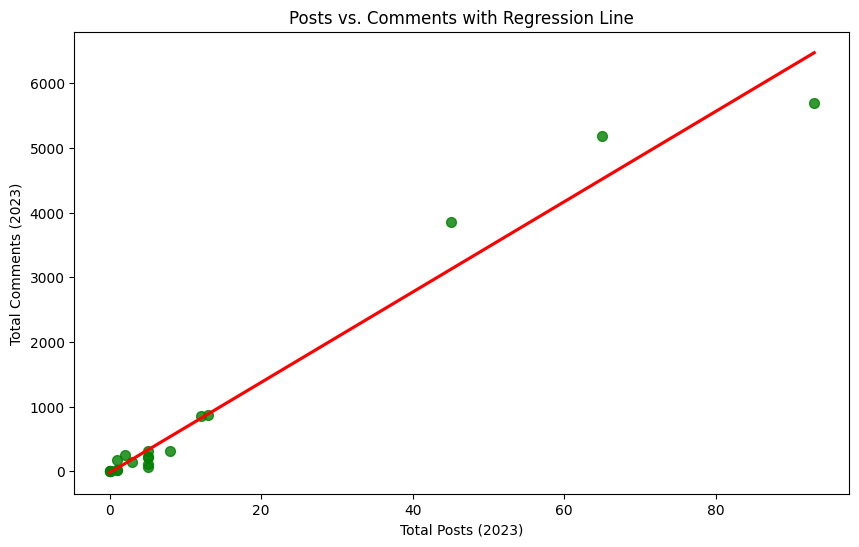

In [ ]:
# Visualization: Scatter Plot with Regression Line (Posts vs. Comments), non-canceled shows
plt.figure(figsize = (10, 6))
sns.regplot(
    x = "Total Posts (2023)", 
    y = "Total Comments (2023)", 
    data = non_canceled_shows, 
    scatter_kws = {'s': 50, 'color': 'green'}, 
    line_kws = {'color': 'red'}, 
    ci = None
)
plt.xlabel("Total Posts (2023)")
plt.ylabel("Total Comments (2023)")
plt.title("Posts vs. Comments with Regression Line")
plt.show()


In [72]:
corr_posts_comments_non_canceled, p_value_posts_comments_non_canceled = stats.pearsonr(non_canceled_shows["Total Posts (2023)"], non_canceled_shows["Total Comments (2023)"])

print(f"Pearson corellation Coefficient (Posts vs Comments): {corr_posts_comments_non_canceled:.3f}")
print(f"P-value: {p_value_posts_comments_non_canceled:.3f}")

if p_value_posts_comments_non_canceled < 0.05: print("There is a statistically significant positive corellation between number of posts and the number of comments.")
else: print("There is no statistically significant corellation between the number of posts and the number of comments.")

Pearson Correlation Coefficient (Posts vs Comments): 0.985
P-value: 0.000
There is a statistically significant positive correlation between number of posts and the number of comments.


---

# 3.0 Does audience engagement* influence the cancellation of Netflix TV shows in 2023?
###  *Audience engagement is measured by the volume of  discussions on Reddit and the number of viewers 

---

---

## 3.1 Sub Research Questions

---

### 3.1.0 Are the hours spent viewing Netflix TV shows (at the end of their final season) correlated with the decision to cancel them? 

H0: There is no correlation between the total viewership hours and cancellation. \
H1: There is a significant positive correlation between viewership hours and cancellation. \
H2: There is a significant negative correlation between viewership hours and cancellation.

In [84]:
corr, p_value_corr = stats.pointbiserialr(aggregated_df["Cancelled"].astype(int), aggregated_df["Total Hours Viewed in 2023"])

print("Correlation: r = {corr:.4f}, p-value = {p_value_corr:.4f}")

if p_value_corr < 0.05:
    if corr > 0: print("Significant positive correlation: Higher viewership is correlated to more cancellations.")
    else: print("Significant negative correlation: Higher viewership is correlated to fewer cancellations.")
else: print("No significant correlation between viewership and cancellation.")

Correlation: r = {corr:.4f}, p-value = {p_value_corr:.4f}
Significant positive correlation: Higher viewership is correlated to more cancellations.


### 3.1.1 Is the volume of discussion on Reddit (r/television (17 million members) and r/NetflixBestOf (11 million members)) during their final season (year) associated with the cancellation of Netflix TV shows as opposed to those not cancelled? 

H0: There is no correlation between the total discussion and cancellation. \
H1: There is significant positive correlation between total discussion and cancellation \
H2: There is significant negative correlation between total discussion and cancellation.



In [83]:
aggregated_df["Total Discussion"] = aggregated_df["Total Posts (2023)"] + aggregated_df["Total Comments (2023)"]
corr, p_value_corr = stats.pointbiserialr(aggregated_df["Cancelled"].astype(int), aggregated_df["Total Discussion"])

print(f"Correlation: r = {corr:.4f}, p-value = {p_value_corr:.4f}")

if p_value_corr < 0.05:
    if corr > 0: print("Significant positive correlation: increased discussion is correlated to more cancellations.")
    else: print("Significant negative correlation: increased discussion is correllated to fewer cancellations.")
else: print("No significant correlation between discussion volume and cancellation.")

Correlation: r = -0.0773, p-value = 0.6356
No significant correlation between discussion volume and cancellation.


---

## 3.2 Predicting cancellations with audience engagement using logistic regression

---

Testing whether independent variables x1, x2 and x3 can be used to predict whether a tv-show will be cancelled. Using the Wald-test to test model significance and evaluating psuedo-R^2 to see whether the model explains the variance in the dataset.

x1 = "total posts on reddit in 2023" \
x2 = "total comments on reddit in 2023" \
x3 = "total Netflix viewership in hours in 2023" \


H0: Independent variables x1, x2, and x3 are not sufficient to create a statistically significant (p < 0.05) logistic regression model that predicts Netflix TV-Show cancellations and the model's pseudo R^2 suggests weak explanatory power (Pseudo R^2 < 0.02). \

H1: Independent variables x1, x2, and x3 are sufficient to create a statistically significant (p <0.05) logistic regression model that predicts Netflix TV-Show cancellations and the model's pseudo R^2 suggests meaningful explanatory power (Pseudo R^2 > 0.02).

In [65]:
# Encode the target variable 'Cancelled' (True/False to 1/0)
aggregated_df['Cancelled'] = aggregated_df['Cancelled'].astype(int)

# Define independent variables (X) and the dependent variable (y)
X = aggregated_df[["Total Posts (2023)", "Total Comments (2023)", "Total Hours Viewed in 2023"]]
y = aggregated_df["Cancelled"]

# Split the data into training and test sets (80% raining, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# Fit the Logistic Regression model
model = LogisticRegression(max_iter = 1000)
model.fit(X_train, y_train)
X_train_with_intercept = sm.add_constant(X_train)
logit_model = sm.Logit(y_train, X_train_with_intercept)
result = logit_model.fit()

print(result.summary(), "\n")

y_pred = model.predict(X_test)

print("Confusion Matrix:", confusion_matrix(y_test, y_pred), "\n")
print("\nClassification Report:", classification_report(y_test, y_pred))


Optimization terminated successfully.
         Current function value: 0.516834
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Cancelled   No. Observations:                   32
Model:                          Logit   Df Residuals:                       28
Method:                           MLE   Df Model:                            3
Date:                Sat, 01 Feb 2025   Pseudo R-squ.:                  0.2458
Time:                        00:27:24   Log-Likelihood:                -16.539
converged:                       True   LL-Null:                       -21.930
Covariance Type:            nonrobust   LLR p-value:                   0.01296
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.4572      0.661      0.691      0.489      

In [66]:
if result.llr_pvalue < 0.05: print(f"The LLR p-value is {result.llr_pvalue:.4f}, which is less than 0.05. \nThe model as a whole is statistically significant.")
else: print(f"The LLR p-value is {result.llr_pvalue:.4f}, which is greater than 0.05. \nThe model as a whole is not statistically significant.")

print(f"\nThe Pseudo R-squared value is {result.prsquared:.4f}. This means that {result.prsquared * 100:.2f}% of the variance in the dependent variable (cancellation) is explained by the model.")

The LLR p-value is 0.0130, which is less than 0.05. 
The model as a whole is statistically significant.

The Pseudo R-squared value is 0.2458. This means that 24.58% of the variance in the dependent variable (cancellation) is explained by the model.
